# Problem 3a

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [193]:
N = 400
delta_tau = 100/N
list_tau = np.arange(start=0, stop=100, step=delta_tau)
list_tau.shape

(400,)

In [187]:
x_0 = np.zeros(N)
x_0.shape

(400,)

In [188]:
def E_kin(x, j, d_tau):
    return (1/2)*((x[j]-x[j-1])/d_tau)**2

def E_pot(x, j): 
    return (1/2)*((x[j]+x[j-1])/2)**2

def S(x, d_tau):
    T = 0
    V = 0
    for j in range(1, x.shape[0]):
        T += (1/2)*((x[j]-x[j-1])/d_tau)**2
        V += (1/2)*((x[j]+x[j-1])/2)**2
    return T+V

def metropolis_algorithm(initial_state, num_trials, d_tau):
    sequence_states = [initial_state]
    for _ in tqdm(range(num_trials)):
        next_sequence = metropolis_step(sequence_states[-1], d_tau)
        sequence_states.append(next_sequence)
    return np.array(sequence_states)
    
def metropolis_step(current_state, d_tau):
    trial_configuration = current_state.copy()
    which_x = np.random.randint(1,current_state.shape[0]-1)
    trial_configuration[which_x] += np.random.uniform(low=-1, high=1)
    delta_S = S(trial_configuration, d_tau) - S(current_state, d_tau)
    trial_acceptance_prob = np.min([1, np.exp(-delta_tau*delta_S)])
    r_accept = np.random.rand()
    if r_accept < trial_acceptance_prob:
        new_state = trial_configuration
    else:
        new_state = current_state
    return np.array(new_state)

In [189]:
N_simulation = 100000
X = metropolis_algorithm(x_0, N_simulation, delta_tau)

100%|██████████| 100000/100000 [01:02<00:00, 1598.97it/s]


In [190]:
E_kin_list = []
E_pot_list = []

for i in tqdm(range(N_simulation)):
    t_time = []
    v_time = []
    for n in range(1, N):
        e_kin = E_kin(X[i], n, delta_tau)
        e_pot = E_pot(X[i], n)
        t_time.append(e_kin)
        v_time.append(e_pot)
    E_kin_list.append(np.mean(t_time))
    E_pot_list.append(np.mean(v_time))
        
E_kin_ = np.array(E_kin_list)
E_pot_ = np.array(E_pot_list)

100%|██████████| 100000/100000 [00:46<00:00, 2134.61it/s]


Text(0, 0.5, 'Energy')

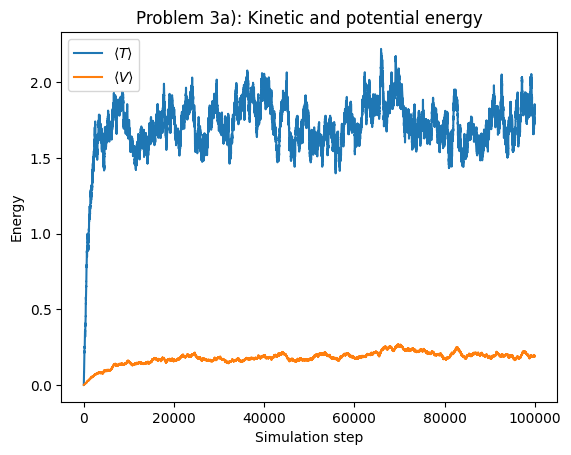

In [191]:
t = np.arange(N_simulation)
plt.plot(t, E_kin_, label=r"$\langle T \rangle$")
plt.plot(t, E_pot_, label=r"$\langle V \rangle$")
plt.legend()
plt.title("Problem 3a): Kinetic and potential energy")
plt.xlabel("Simulation step")
plt.ylabel("Energy")

The potential energy doesn't change and the kinetic energy goes to very high values on average. This is because in each iteration we displace one particle with a very high speed. However, since we sample the displacements from a uniform distribution from $\Delta x \in [-1,1]$, on average the positions will stay at $x_{i}=0$. the Virial theorem is clearly not fulfilled, as can be seen in the plot.

# Problem 3b

Text(0, 0.5, 'relative frequency')

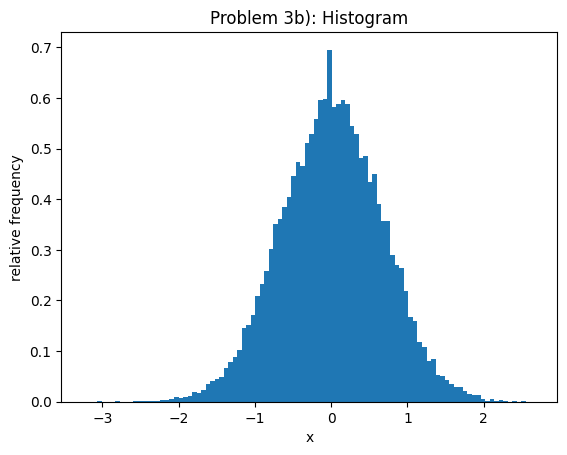

In [192]:
t_equilibrium = 20000

vals, bins = np.histogram(X[t_equilibrium:], bins=100, density=True)
plt.stairs(vals, bins, fill=True)
plt.title("Problem 3b): Histogram")
plt.xlabel("x")
plt.ylabel("relative frequency")

The histogram corresponds to the probability distribution of the position x of the particle. According to Quantum mechanics, this is equal to the square of the wave function.